<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Twitter_Sentiment_Analysis_ML2_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Lab 2

## Assignment 3 (Deadline : 05/02/2023 11:59PM)

Total Points : 25

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab3_TLP23.ipynb

**Assignment**: 3-class Sentiment Analysis with LSTM on Twitter Data
 

**Objective**:
The objective of this assignment is to train a LSTM neural network to perform 3-class sentiment analysis on Twitter data.
 

**Dataset**:
The dataset used in this assignment is the Sentiment140 dataset, which can be downloaded from http://help.sentiment140.com/for-students. The dataset consists of 1.6 million tweets, labeled as positive (4), neutral (2), or negative (0)


*   Collect a sample of at least 100,000 tweets from the dataset **(1 points)**


*   Preprocess the text data by removing punctuation, lowercasing, removing stop words, and tokenizing the words **(3 points)**

*   Split the data into training and testing sets, and pad the sequences to the same length **(2 points)**

*   Build a LSTM model to classify the tweets as positive, neutral, or negative. The model should have an Embedding layer, followed LSTM layers of your choosing, and a dense layer for output **(7 points)**

*   Train the model on the training data and evaluate its performance on the testing data **(3 points)**


*   Fine-tune the model by experimenting with different architectures, optimizers, activation functions, and hyperparameters. Feel free to experiment with GRUs **(4 points)**


*   Report the accuracy, precision, recall, and F1 score of the model on the testing data. Inclue graphs and necessary data. Include this in a markdown cell within the notebook. Compare the basic LSTM model against SOTA and other architectures which you can directly import **(3 points)**


*   Use the trained model to predict the sentiment of 25 new tweets with positive (2), neutral (1), or negative (0) **(2 points)**



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import zeros
import nltk
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Embedding, LSTM
from keras.layers.core import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.layers import SpatialDropout1D

# download stopwords (we're gonna need it later)
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df1 = pd.read_csv("/content/1.tsv", usecols=[2,3], sep="\t", names=["sentiment", "text"])
df2 = pd.read_csv("/content/2.tsv", usecols=[2,3], sep="\t", names=["sentiment", "text"])

In [3]:
df3 = pd.read_csv("/content/3.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
#display(df3)
df4 = pd.read_csv("/content/4.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
df5 = pd.read_csv("/content/5.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
df6 = pd.read_csv("/content/6.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
df7 = pd.read_csv("/content/7.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
df8 = pd.read_csv("/content/8.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
df9 = pd.read_csv("/content/9.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
df10 = pd.read_csv("/content/10.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
display(df10)

df11 = pd.read_csv("/content/11.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
df12 = pd.read_csv("/content/12.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])
df13 = pd.read_csv("/content/13.txt", usecols=[1,2], sep="\t", names=["sentiment", "text"])

,sentiment,text
0,neutral,05 Beat it - Michael Jackson - Thriller (25th ...
1,positive,Jay Z joins Instagram with nostalgic tribute t...
2,neutral,Michael Jackson: Bad 25th Anniversary Edition ...
3,positive,I liked a @YouTube video http://t.co/AaR3pjp2P...
4,positive,18th anniv of Princess Diana's death. I still ...
...,...,...
1961,positive,I need to become a celebrity so I can just be ...
1962,positive,Snoop dogg may be the funniest human alive
1963,neutral,I'm only ok with 3rd floor playing Snoop Dogg ...
1964,positive,SNOOP DOGG AKA SNOOPADELIC friday friday only ...


In [4]:
horizontal_concat = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8,df9, df10, df11, df12,df13], axis=1)


In [32]:
#horizontal_concat

In [6]:
vertical_concat = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8,df9, df10, df11, df12,df13], axis=0)


In [7]:
df=vertical_concat
df

,sentiment,text
0,negative,"I know I missed something here , but what does..."
1,neutral,What do you think of Beside Ourselves as a tit...
2,positive,:D I intend to be one someday .
3,negative,LLLINKKK LLLINKKK IIIMAGEEELLLINKKK The choice...
4,neutral,LLLINKKK Some more mountains .
...,...,...
5863,positive,@Racalto_SK ok good to know. Punting at MetLif...
5864,neutral,everyone who sat around me at metlife was so a...
5865,neutral,what giants or niners fans would wanna go to t...
5866,positive,Anybody want a ticket for tomorrow Colombia vs...


# Preprocess the text data by removing punctuation, lowercasing, removing stop words, and tokenizing the words (3 points)



In [8]:
def clean_text(text):
    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    
    return " ".join(tokens)

# apply clean_text function in our data
df.text = df.text.apply(lambda x: clean_text(x))

# show the first five rows of data (to verify again)
print("Cleaned data: ")
print(df.head())

Cleaned data: 
  sentiment                                               text
0  negative                    know missed something thud mean
1   neutral                                 think beside title
2  positive                                 intend one someday
3  negative  lllinkkk lllinkkk iiimageeelllinkkk choice tak...
4   neutral                                 lllinkkk mountains


In [9]:
dummies = pd.get_dummies(df.sentiment)
dummies

,negative,neutral,positive
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
5863,0,0,1
5864,0,1,0
5865,0,1,0
5866,0,0,1


In [10]:
df = pd.concat([df,dummies],axis='columns')
df = df.drop(['sentiment'], axis='columns')
df

,text,negative,neutral,positive
0,know missed something thud mean,1,0,0
1,think beside title,0,1,0
2,intend one someday,0,0,1
3,lllinkkk lllinkkk iiimageeelllinkkk choice tak...,1,0,0
4,lllinkkk mountains,0,1,0
...,...,...,...,...
5863,ok good know punting metlife december task hop...,0,0,1
5864,everyone sat around metlife annoying didnt let...,0,1,0
5865,giants niners fans would wanna go sunday night...,0,1,0
5866,anybody want ticket tomorrow colombia vs peru ...,0,0,1


# Split the data into training and testing sets, and pad the sequences to the same length

In [11]:
# split our data into train set (80%) and test set (20%)
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 10)

# length of each set
print("Train data size: ", len(train_data))
print("Test data size: ", len(test_data))

# # how many examples of each class there is in each set
# print("Train data distr: ")
# print(train_data.sentiment.value_counts())
# print("Test data distr: ")
# print(test_data.sentiment.value_counts())

Train data size:  42694
Test data size:  10674


In [12]:
train_data

,text,negative,neutral,positive
543,south nike tomorrow 3 10 come thru bc nike gt ...,0,0,1
9398,makin trip see magic opener tomorrow yes,0,1,0
1295,greek pm alexis tsipras flavour year jupiter s...,0,1,0
13,may say mtv awards shit w michael jackson,1,0,0
2271,want dunkin donuts breakfast may get tomorrow ...,0,0,1
...,...,...,...,...
1149,tuesday typically day go dunkin see movie get ...,0,1,0
2996,google great youtube purchase gt 40bn bet face...,0,0,1
2331,person left packed theatre waiting see 2nd end...,0,1,0
13193,next monday going year since wwa show niall bd...,0,0,1


In [13]:
x_train= train_data.drop(['negative',	'neutral',	'positive'], axis='columns')
y_train= train_data.drop(['text'], axis='columns')
x_test= test_data.drop(['negative',	'neutral',	'positive'], axis='columns')
y_test= test_data.drop(['text'], axis='columns')

In [14]:
x_test.shape
y_test.shape

(10674, 3)

In [15]:
y_train

,negative,neutral,positive
543,0,0,1
9398,0,1,0
1295,0,1,0
13,1,0,0
2271,0,0,1
...,...,...,...
1149,0,1,0
2996,0,0,1
2331,0,1,0
13193,0,0,1


In [16]:
tokenizer = Tokenizer()
# fit the tokenizer in the train text
tokenizer.fit_on_texts(train_data.text)

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [17]:
#y_train= train_data
#y_test= test_data

# pad the sequences to the same length

In [18]:
# get max length of the train data
max_length = max([len(s.split()) for s in train_data.text])

# pad sequences in x_train data set to the max length
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = max_length)
# pad sequences in x_test data set to the max length
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = max_length)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape:  (42694, 597)
x_test shape:  (10674, 597)
y_train shape: (42694, 3)
y_test shape: (10674, 3)


In [19]:
x_train

array([[   0,    0,    0, ...,  408,  408,  408],
       [   0,    0,    0, ..., 1681,    1,  264],
       [   0,    0,    0, ..., 1037,  245,   84],
       ...,
       [   0,    0,    0, ...,   76,   29, 1801],
       [   0,    0,    0, ...,  292, 1066, 6321],
       [   0,    0,    0, ..., 3668, 3755,  196]], dtype=int32)

# Build a LSTM model to classify the tweets as positive, neutral, or negative. The model should have an Embedding layer, followed LSTM layers of your choosing, and a dense layer for output (7 points)



In [20]:
embed_dim = 128
lstm_out = 196
max_fatures = 1000
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = x_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 597, 128)          128000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 597, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 383,391
Trainable params: 383,391
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
y_train

,negative,neutral,positive
543,0,0,1
9398,0,1,0
1295,0,1,0
13,1,0,0
2271,0,0,1
...,...,...,...
1149,0,1,0
2996,0,0,1
2331,0,1,0
13193,0,0,1


In [22]:
# print(y_train)
# x_train = np.array([np.array(val) for val in x_train])
# y_train = np.array([np.array(val) for val in y_train])
# print(y_train)
#x_train = tf.cast(x_train , dtype=tf.float32)
#y_train = tf.cast(y_train , dtype=tf.float32)
#x_train = np.array([np.array(val) for val in x_train])
#y_train = np.array([np.array(val) for val in y_train])
# batch_size = 32
# model.fit(x_train, y_train, epochs = 7, batch_size=batch_size, verbose = 2)

In [23]:
y_train
#x_train.shape

,negative,neutral,positive
543,0,0,1
9398,0,1,0
1295,0,1,0
13,1,0,0
2271,0,0,1
...,...,...,...
1149,0,1,0
2996,0,0,1
2331,0,1,0
13193,0,0,1


In [24]:
#pip install opencv-python

In [25]:
# from skimage.transform import resize

# x_train_resized = []
# for img in x_train:
#     resized = resize(img, (224,224), mode='constant')
#     x_train_resized.append(resized)
# x_train = np.array(x_train_resized)


In [26]:
# import cv2
# x_train_resized = []
# for img in x_train:
#     resized = cv2.resize(img, (224,224))
#     x_train_resized.append(resized)
# x_train = np.array(x_train_resized)

In [27]:
# batch_size = 32
# model.fit(x_train, y_train, epochs = 20, batch_size=batch_size, verbose = 2)

# Train the model on the training data and evaluate its performance on the testing data (3 points)

Fine-tune the model by experimenting with different architectures, optimizers, activation functions, and hyperparameters. Feel free to experiment with GRUs (4 points)


In [28]:
BATCH_SIZE = 1024
EPOCHS = 15

model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

# callbacks
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', 
                              factor = 0.1,
                              min_lr = 0.01)

# train model
history = model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    validation_split = 0.1, verbose = 1, callbacks = [reduce_lr])

Epoch 1/15
38/38 [==============================] - 89s 2s/step - loss: 0.6114 - accuracy: 0.4628 - val_loss: 0.5927 - val_accuracy: 0.5119 - lr: 0.0010
Epoch 2/15
38/38 [==============================] - 82s 2s/step - loss: 0.5736 - accuracy: 0.5248 - val_loss: 0.5459 - val_accuracy: 0.5562 - lr: 0.0010
Epoch 3/15
38/38 [==============================] - 82s 2s/step - loss: 0.5124 - accuracy: 0.6036 - val_loss: 0.4947 - val_accuracy: 0.6225 - lr: 0.0010
Epoch 4/15
38/38 [==============================] - 82s 2s/step - loss: 0.4877 - accuracy: 0.6349 - val_loss: 0.4875 - val_accuracy: 0.6295 - lr: 0.0010
Epoch 5/15
38/38 [==============================] - 83s 2s/step - loss: 0.4794 - accuracy: 0.6415 - val_loss: 0.4869 - val_accuracy: 0.6337 - lr: 0.0010
Epoch 6/15
38/38 [==============================] - 82s 2s/step - loss: 0.4771 - accuracy: 0.6455 - val_loss: 0.4857 - val_accuracy: 0.6335 - lr: 0.0010
Epoch 7/15
38/38 [==============================] - 82s 2s/step - loss: 0.4769 - a

In [29]:
# evaluate model
score = model.evaluate(x_test, y_test, batch_size = BATCH_SIZE)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# save model
model.save('model_final.h5')

11/11 [==============================] - 2s 224ms/step - loss: 0.4945 - accuracy: 0.6267
Test loss: 0.494543194770813
Test accuracy: 0.6266629099845886


# Report the accuracy, precision, recall, and F1 score of the model on the testing data. Inclue graphs and necessary data. Include this in a markdown cell within the notebook. Compare the basic LSTM model against SOTA and other architectures which you can directly import (3 points)


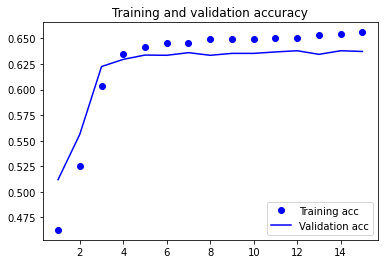

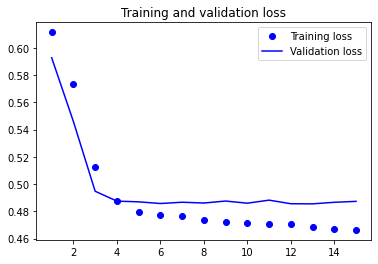

In [30]:
# plotting model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
#pip install tensorflow==2.4.0

# Use the trained model to predict the sentiment of 25 new tweets with positive (2), neutral (1), or negative (0) (2 points)

In [41]:
from keras.models import load_model

# Load model
model = load_model('model_final.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [47]:
predict_class(["I love doing it"])


The predicted sentiment is Positive